In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
# read data
df = pd.read_csv('../input/nyc-data.csv')
df.head()

,Land_sqf,Gross_sqf,Year_built,NBH_level,SALE_PRICE,YEARLY_RENT
0,2400,1552,1930,2,220485,10900
1,2742,1207,1925,2,223372,8100
2,5610,1320,1910,5,362981,19000
3,1758,1537,1910,5,245135,9700
4,1317,1339,1920,4,216477,12800


In [20]:
# drop the 'SALE_PRICE' column from the original dataframe; working with only 'YEARLY_RENT' for now
df_drop_sp = df.drop(['SALE_PRICE'], axis=1)

In [21]:
# perform clustering
X = df_drop_sp.values
clusterer = AgglomerativeClustering(n_clusters=3)
cluster_labels = clusterer.fit_predict(X)

In [26]:
# find the count of each cluster label
labels, counts = np.unique(cluster_labels, return_counts=True)
print(f"labels = {labels}, counts = {counts}")

labels = [0 1 2], counts = [ 40 155  96]


In [23]:
# add the cluster labels column to df_drop_sp
df_drop_sp['cluster_labels'] = list(cluster_labels)
df_drop_sp.head(5)

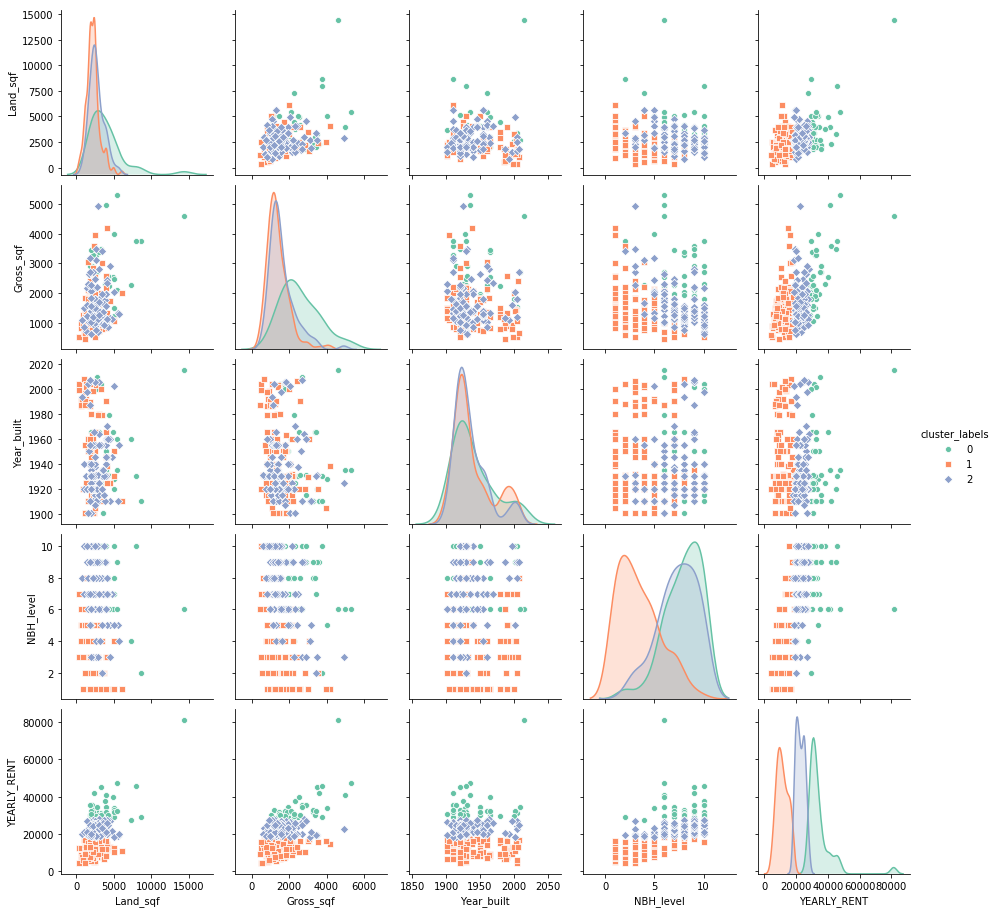

In [25]:
sns.pairplot(df_drop_sp, kind="scatter", hue="cluster_labels", markers=["o", "s", "D"], palette="Set2")
plt.show()